<a href="https://colab.research.google.com/github/sinha96/kaggel_dataset_analysis/blob/master/Restaurant_segmentation_zomato_bangalore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import sys
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
import yellowbrick
from sklearn.metrics import silhouette_score

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/open?id=1Gfo-BSAdnpV2D4I9O-m-1avXzqaoE_Dy'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('zomato.csv')  
data = pd.read_csv('zomato.csv')
# Dataset is now stored in a Pandas Dataframe

1Gfo-BSAdnpV2D4I9O-m-1avXzqaoE_Dy


In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [0]:
clean_data = data.drop(['url','address','name','phone','menu_item','reviews_list','listed_in(city)'],axis=1)

In [8]:
clean_data.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [9]:
data.dish_liked[0]

'Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'

In [10]:
cui = []
Cui = {}
for i in clean_data.index:
    cui.append(str(clean_data.cuisines[i]).strip().split(','))
    Cui[i] = cui[i]
Cui

{0: ['North Indian', ' Mughlai', ' Chinese'],
 1: ['Chinese', ' North Indian', ' Thai'],
 2: ['Cafe', ' Mexican', ' Italian'],
 3: ['South Indian', ' North Indian'],
 4: ['North Indian', ' Rajasthani'],
 5: ['North Indian'],
 6: ['North Indian', ' South Indian', ' Andhra', ' Chinese'],
 7: ['Pizza', ' Cafe', ' Italian'],
 8: ['Cafe', ' Italian', ' Continental'],
 9: ['Cafe', ' Mexican', ' Italian', ' Momos', ' Beverages'],
 10: ['Cafe'],
 11: ['Cafe', ' Italian', ' Continental'],
 12: ['Cafe', ' Chinese', ' Continental', ' Italian'],
 13: ['Cafe', ' Continental'],
 14: ['Cafe', ' Mexican', ' Italian'],
 15: ['Cafe'],
 16: ['Cafe', ' Fast Food', ' Continental', ' Chinese', ' Momos'],
 17: ['Chinese', ' Cafe', ' Italian'],
 18: ['Cafe', ' Italian', ' American'],
 19: ['Cafe', ' Chinese', ' Continental', ' Italian'],
 20: ['Cafe', ' French', ' North Indian'],
 21: ['Cafe', ' Pizza', ' Fast Food', ' Beverages'],
 22: ['Cafe', ' Fast Food'],
 23: ['Italian', ' Fast Food', ' Cafe', ' Europea

In [11]:
le = []
for i in cui:
    le.append(len(i))
print(max(le),min(le))

8 1


In [12]:
level = []
for i in Cui.values():
    if len(i) < 8:
        for j in range(8-len(i)):
            i.append('')
    level.append(len(i))
cat_df = pd.DataFrame(Cui).T
print(cat_df.shape)
cat_df.head(10)

(51717, 8)


,0,1,2,3,4,5,6,7
0,North Indian,Mughlai,Chinese,,,,,
1,Chinese,North Indian,Thai,,,,,
2,Cafe,Mexican,Italian,,,,,
3,South Indian,North Indian,,,,,,
4,North Indian,Rajasthani,,,,,,
5,North Indian,,,,,,,
6,North Indian,South Indian,Andhra,Chinese,,,,
7,Pizza,Cafe,Italian,,,,,
8,Cafe,Italian,Continental,,,,,
9,Cafe,Mexican,Italian,Momos,Beverages,,,


In [0]:
clean_data = pd.concat([clean_data,cat_df],axis=1)

In [0]:
clean_data.drop(['rest_type','dish_liked','cuisines'],axis=1,inplace=True)

In [0]:
clean_data.columns = ['online_order','book_table','rate','votes','location', 'approx_cost(for two people)','listed_in(type)',
                      'cuisine_cat1','cuisine_cat2','cuisine_cat3','cuisine_cat4','cuisine_cat5','cuisine_cat6','cuisine_cat7'
                      ,'cuisine_cat8']

In [0]:
clean_data = clean_data.replace('',np.nan)

In [17]:
39270/51717

0.7593247868205812

In [0]:
clean_data.drop(['cuisine_cat3','cuisine_cat4','cuisine_cat5','cuisine_cat6','cuisine_cat7','cuisine_cat8'],axis=1,inplace=True)

In [0]:
clean_data.cuisine_cat2 = clean_data.cuisine_cat2.replace(np.nan,'')

In [0]:
clean_data.dropna(axis=0,inplace=True)

In [21]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
data[data['rate']=='-']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3068,https://www.zomato.com/bangalore/house-of-tast...,"#235/1 12th Cross, Wilson Garden, Bangalore",House of Tasty Food,No,No,-,0,+91 9538004054,Wilson Garden,Quick Bites,NaN,North Indian,400,[],[],Delivery,Basavanagudi
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3373,https://www.zomato.com/bangalore/right-pizza-b...,"Shop 9, East Anjanaiya Temple Street, Gandhi B...",Right Pizza,Yes,No,-,0,+91 9980473473\n+91 9845338098,Basavanagudi,Quick Bites,NaN,Pizza,300,[],[],Dine-out,Basavanagudi
3378,https://www.zomato.com/bangalore/mezban-family...,"Lalbagh Fort Road, basavanagudi, Banglore.",Mezban Family Restaurant,Yes,No,-,0,+91 9344609944\n+91 8072284844,Basavanagudi,Quick Bites,NaN,"Chinese, North Indian",300,"[('Rated 5.0', 'RATED\n Food was delicious es...",[],Dine-out,Basavanagudi
3387,https://www.zomato.com/bangalore/mota-bawarchi...,"19/A H. Siddhaiah Road, Sudhama Nagar, Opposit...",Mota Bawarchi,No,No,-,0,+91 9380109284,Basavanagudi,Quick Bites,NaN,"North Indian, Biryani, Fast Food",300,[],[],Dine-out,Basavanagudi
3396,https://www.zomato.com/bangalore/aahar-cafe-ba...,"39/4, North Anjaneya Temple Street, Basavanagu...",Aahar Cafe,No,No,-,0,+91 9448353673,Basavanagudi,Quick Bites,NaN,South Indian,100,"[('Rated 1.0', 'RATED\n Ververy bad.....not g...",[],Dine-out,Basavanagudi
3397,https://www.zomato.com/bangalore/arya-vysya-re...,"12/1, Food Street, Old Market Road, V.V.Puram,...",Arya Vysya Refreshment,No,No,-,0,080 26614521\n+91 9901903396,Basavanagudi,Quick Bites,NaN,South Indian,100,[],[],Dine-out,Basavanagudi
3398,https://www.zomato.com/bangalore/victoria-term...,"15, South End Road, Basavanagudi, Bangalore",Victoria Terminus,No,No,-,0,080 65555612,Basavanagudi,Quick Bites,NaN,"Fast Food, Maharashtrian",250,[],[],Dine-out,Basavanagudi
3408,https://www.zomato.com/bangalore/idly-mane-bas...,"11/1 & 11/5 Food Street, Old Market Road, V.V....",Idly Mane,No,No,-,0,+91 9916994813\n+91 9513063623,Basavanagudi,Quick Bites,NaN,"South Indian, Street Food",200,[],[],Dine-out,Basavanagudi
3409,https://www.zomato.com/bangalore/oasis-food-ce...,"1395, 2nd Cross, Kathriguppe Main Road, Behind...",Oasis Food Center,No,No,-,0,+91 8105575495,Basavanagudi,Quick Bites,NaN,Fast Food,150,"[('Rated 4.0', 'RATED\n One stop shop for che...",[],Dine-out,Basavanagudi


In [0]:
clean_data['rate'] = clean_data.rate.apply(lambda x : (x.replace('NEW','0').split('/')[0].strip()))

In [0]:
clean_data.rate = clean_data.rate.replace('-',0)

In [25]:
clean_data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [0]:
clean_data['approx_cost(for two people)'] = clean_data['approx_cost(for two people)'].apply(lambda x : int(x.replace(',','')))

In [0]:
clean_data.online_order,oo_name = pd.factorize(clean_data.online_order)
#clean_data.online_order = clean_data.online_order.astype('category')
clean_data.book_table,bt_name = pd.factorize(clean_data.book_table)
#clean_data.book_table = clean_data.book_table.astype('category')
clean_data.location , loc_name = pd.factorize(clean_data.location)
#clean_data.location = clean_data.location.astype('category')
clean_data['listed_in(type)'] , loc_name = pd.factorize(clean_data['listed_in(type)'])
#clean_data['listed_in(type)'] = clean_data['listed_in(type)'].astype('category')
clean_data['cuisine_cat1'] , cus1_name = pd.factorize(clean_data['cuisine_cat1'])
#clean_data['cuisine_cat1'] = clean_data['cuisine_cat1'].astype('category')
clean_data['cuisine_cat2'] , cus2_name = pd.factorize(clean_data['cuisine_cat2'])
#clean_data['cuisine_cat2'] = clean_data['cuisine_cat2'].astype('category')

In [0]:
clean_data.rate = clean_data.rate.astype('float64')

In [29]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43690 entries, 0 to 51716
Data columns (total 9 columns):
online_order                   43690 non-null int64
book_table                     43690 non-null int64
rate                           43690 non-null float64
votes                          43690 non-null int64
location                       43690 non-null int64
approx_cost(for two people)    43690 non-null int64
listed_in(type)                43690 non-null int64
cuisine_cat1                   43690 non-null int64
cuisine_cat2                   43690 non-null int64
dtypes: float64(1), int64(8)
memory usage: 3.3 MB


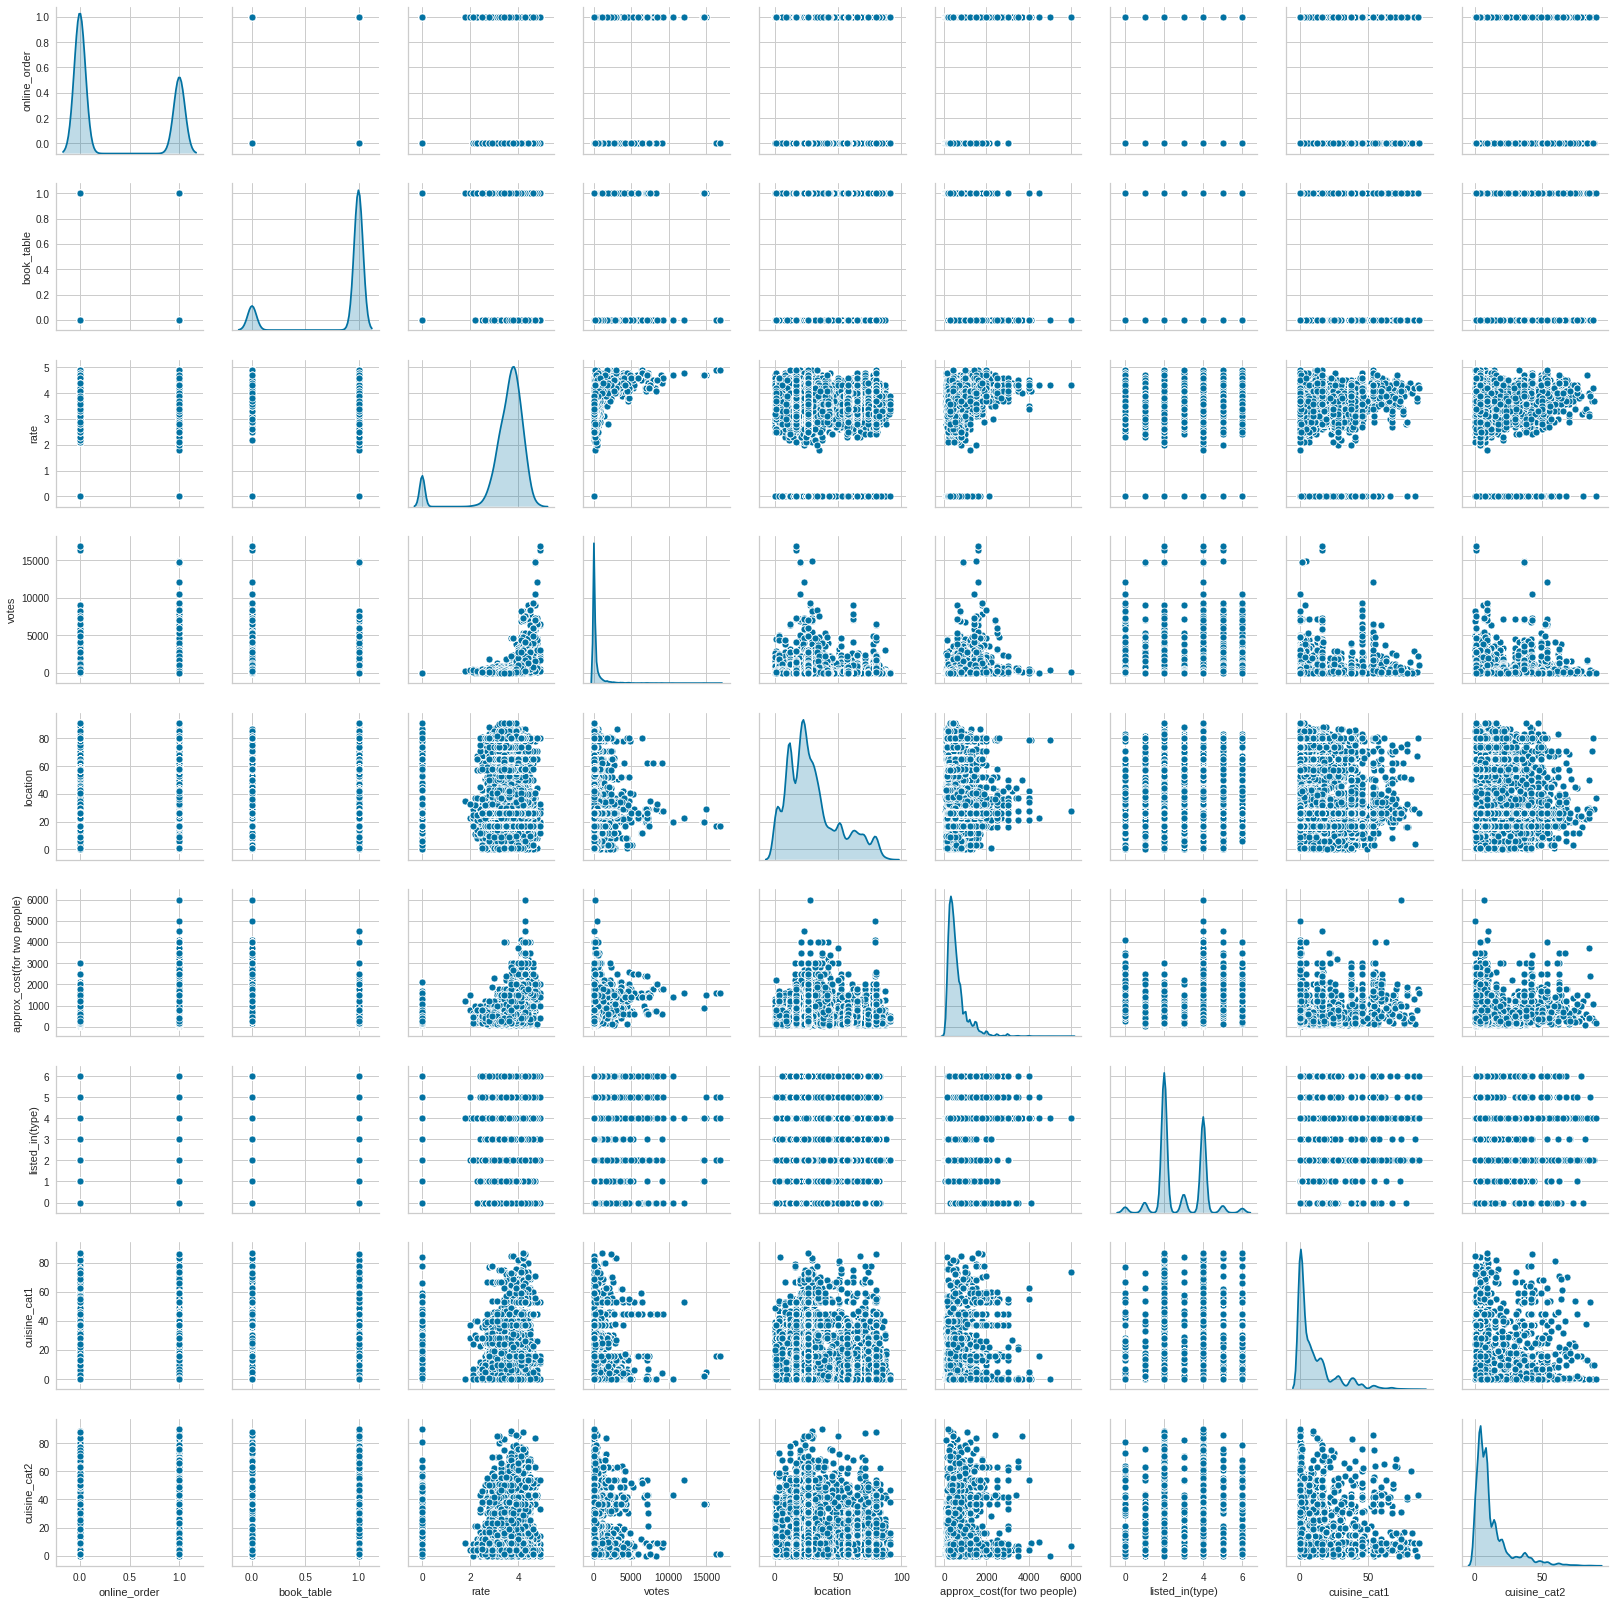

In [30]:
sns.pairplot(clean_data,diag_kind='kde');

In [0]:
sc = StandardScaler()
x_sc = sc.fit_transform(clean_data)

In [0]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
ab = pd.DataFrame(x_sc)
for i in range(2,11):
    mdl = KMeans(n_clusters=i,random_state=42)
    a = mdl.fit_predict(x_sc)
    
    ab['k_'+str(i)] = a
    # Instantiate the clustering model and visualizer
    print('silhoutte coef for {} clusters is {}'.format(i,silhouette_score(x_sc, ab['k_'+str(i)])))
    visualizer = SilhouetteVisualizer(mdl)
    fig = plt.figure(figsize=(10,10))
    visualizer.fit(x_sc) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

In [0]:
error = []
for i in range(2,11):
    mdl = KMeans(n_clusters=i,random_state=42)
    a = mdl.fit_predict(x_sc)
    error.append(mdl.inertia_)

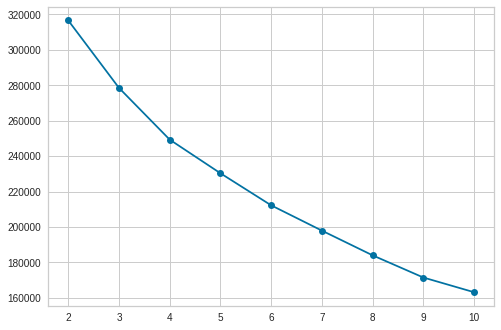

In [35]:
plt.plot(range(2,11),error,marker='o')
plt.show()

In [37]:
x_sc.shape 

(43690, 9)

In [0]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(clean_data[['rate','votes','approx_cost(for two people)']])

In [46]:
x_pca

array([[ 478.67658118,   90.40485317],
       [ 490.30548354,   87.44366726],
       [ 617.25424075,   55.11730538],
       ...,
       [ -73.45603682,  953.33793474],
       [ 375.84630461, 1870.83932497],
       [ -87.02315193,  956.79259675]])

In [47]:
pca.explained_variance_ratio_

array([0.81844845, 0.18155074])

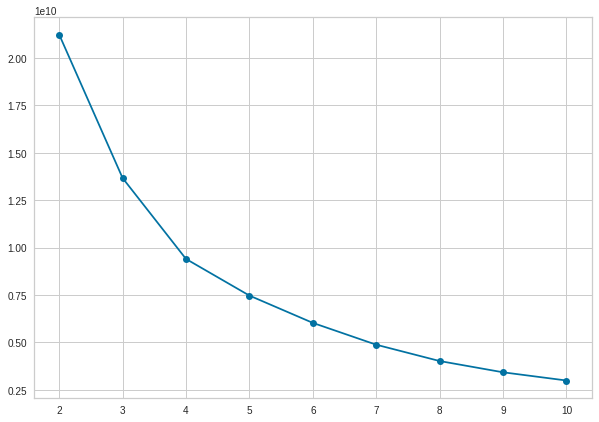

In [50]:
error_pca = []
for i in range(2,11):
    mdl = KMeans(n_clusters=i,random_state=42)
    a = mdl.fit_predict(x_pca)
    error_pca.append(mdl.inertia_)
fig = plt.figure(figsize=(10,7))
plt.plot(range(2,11),error_pca,marker='o')
plt.show()

In [51]:
clean_data

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2
0,0,0,4.1,775,0,800,0,0,0
1,0,1,4.1,787,0,800,0,1,1
2,0,1,3.8,918,0,800,0,2,2
3,1,1,3.7,88,0,300,0,3,1
4,1,1,3.8,166,1,600,0,0,3
5,0,1,3.8,286,1,600,0,0,4
6,1,1,3.6,8,2,800,0,0,5
7,0,0,4.6,2556,0,600,1,4,6
8,0,1,4.0,324,0,700,1,2,7
9,0,1,4.2,504,0,550,1,2,2


In [0]:
data.dropna(axis=0,inplace=True)

In [0]:
mdl = KMeans(n_clusters=5,random_state=42)
clean_data['group'] = mdl.fit_predict(x_pca)

In [56]:
clean_data.head()

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2,group
0,0,0,4.1,775,0,800,0,0,0,0
1,0,1,4.1,787,0,800,0,1,1,0
2,0,1,3.8,918,0,800,0,2,2,0
3,1,1,3.7,88,0,300,0,3,1,4
4,1,1,3.8,166,1,600,0,0,3,4


In [58]:
clean_data.tail()

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2,group
51709,1,1,3.7,34,26,800,6,0,9,4
51711,1,1,2.5,81,26,800,6,28,5,4
51712,1,1,3.6,27,26,1500,6,16,4,1
51715,1,0,4.3,236,58,2500,6,37,4,1
51716,1,1,3.4,13,58,1500,6,37,1,1


In [59]:
clean_data.head(50)

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2,group
0,0,0,4.1,775,0,800,0,0,0,0
1,0,1,4.1,787,0,800,0,1,1,0
2,0,1,3.8,918,0,800,0,2,2,0
3,1,1,3.7,88,0,300,0,3,1,4
4,1,1,3.8,166,1,600,0,0,3,4
5,0,1,3.8,286,1,600,0,0,4,4
6,1,1,3.6,8,2,800,0,0,5,4
7,0,0,4.6,2556,0,600,1,4,6,3
8,0,1,4.0,324,0,700,1,2,7,4
9,0,1,4.2,504,0,550,1,2,2,4


In [64]:
clean_data[clean_data.group==1]

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2,group
166,0,0,4.1,364,3,1200,2,22,28,1
303,0,0,4.0,349,0,1200,2,17,15,1
375,0,0,4.1,442,3,1200,2,16,40,1
555,0,0,4.0,349,0,1200,4,17,15,1
779,1,1,2.7,377,1,1100,4,0,8,1
862,1,1,2.7,377,1,1100,5,0,8,1
869,1,1,4.3,353,8,1200,0,0,5,1
1080,0,1,3.6,42,13,1500,2,1,1,1
1135,0,0,4.2,611,12,1500,2,13,9,1
1249,0,0,4.1,583,8,1200,2,16,40,1


In [65]:
clean_data[clean_data.group==0]

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2,group
0,0,0,4.1,775,0,800,0,0,0,0
1,0,1,4.1,787,0,800,0,1,1,0
2,0,1,3.8,918,0,800,0,2,2,0
14,0,1,3.8,918,0,800,1,2,2,0
37,0,1,4.2,1647,0,600,2,1,16,0
48,0,1,3.7,679,5,850,2,1,16,0
54,1,1,4.0,1047,0,450,2,5,9,0
63,1,0,4.0,808,0,850,2,0,8,0
65,0,1,4.1,1720,1,400,2,0,22,0
67,1,1,4.1,868,0,1200,2,16,7,0


In [66]:
clean_data[clean_data.group==2]

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2,group
3762,1,0,4.8,7023,23,1500,0,0,43,2
3921,0,0,4.9,16345,17,1600,2,16,1,2
4131,0,0,4.2,7193,17,1400,2,16,7,2
4800,1,0,4.8,7023,23,1500,4,0,43,2
4801,0,0,4.9,16345,17,1600,4,16,1,2
4802,0,0,4.2,7193,17,1400,4,16,7,2
4944,0,0,4.9,16345,17,1600,5,16,1,2
4945,0,0,4.2,7193,17,1400,5,16,7,2
4963,1,0,4.8,7023,23,1500,6,0,43,2
4964,0,0,4.2,7193,17,1400,6,16,7,2


In [67]:
clean_data[clean_data.group==3]

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2,group
7,0,0,4.6,2556,0,600,1,4,6,3
38,0,1,4.4,4884,3,750,2,0,0,3
44,0,0,4.6,2556,0,600,2,4,6,3
86,0,1,4.4,4401,3,600,2,7,1,3
207,0,0,4.1,2339,3,1500,2,0,8,3
557,0,0,4.6,2556,0,600,4,4,6,3
769,1,1,4.4,4460,1,150,4,3,4,3
863,0,0,4.4,2487,11,900,0,0,7,3
865,0,1,4.3,3178,11,750,0,0,0,3
868,1,0,4.7,3845,8,1600,0,0,43,3


In [68]:
clean_data[clean_data.group==4]

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type),cuisine_cat1,cuisine_cat2,group
3,1,1,3.7,88,0,300,0,3,1,4
4,1,1,3.8,166,1,600,0,0,3,4
5,0,1,3.8,286,1,600,0,0,4,4
6,1,1,3.6,8,2,800,0,0,5,4
8,0,1,4.0,324,0,700,1,2,7,4
9,0,1,4.2,504,0,550,1,2,2,4
10,0,1,4.1,402,0,500,1,2,4,4
11,0,0,4.2,150,0,600,1,2,7,4
12,0,0,4.2,164,0,500,1,2,8,4
13,1,1,4.0,424,0,450,1,2,9,4


In [70]:
clean_data.groupby('group',as_index=False).count()['online_order']

0     3584
1     2885
2      193
3     1055
4    35973
Name: online_order, dtype: int64